In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('1_f.csv')

In [3]:
df.shape

(299, 1)

In [4]:
df.head()

,746
0,751
1,749
2,686
3,698
4,669


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   746     299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [6]:
M=df.mean()
print(M[0])

744.7959866220735


In [7]:
SDNN=df.std()
print(SDNN[0])

38.76276820099212


In [8]:
CV=(SDNN/M)*100
print(CV[0],'%')

5.204481347542657 %


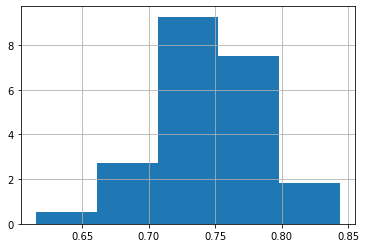

In [9]:
df1=df.div(1000)
plt.hist(df1['746'],bins=5,density=True)
plt.grid(1)
plt.show()

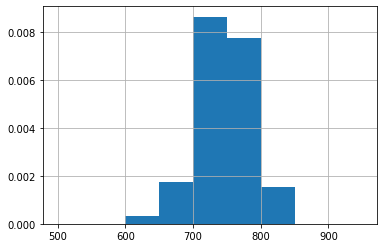

In [10]:
plt.hist(df['746'],bins=range(500,1000,50),density=True)
plt.grid(1)
plt.show()

In [11]:
M0=df.mode()
print('700 <= '+'M0 '+'< 750''\n',M0['746'][0] ,'exact mode number')

700 <= M0 < 750
 726 exact mode number


In [12]:
AM0=(df[(df['746']<750) & (df['746']>=700)].count())/df.count()/0.05
print(AM0[0])

8.628762541806019


In [13]:
MxDMn=df.max()-df.min()
print(MxDMn[0])

229


In [14]:
SI=(AM0)/(2*(M0/1000)*(MxDMn/1000))
print(SI['746'][0])

25.950541165343445


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


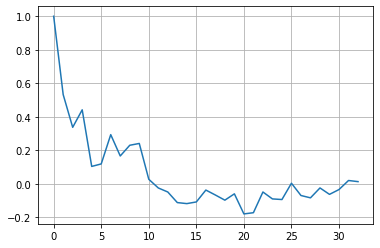

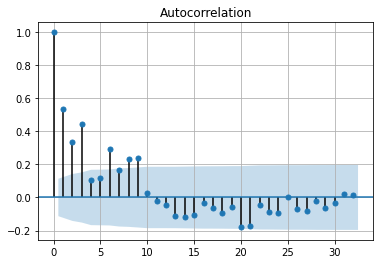

In [15]:
import statsmodels.api as sm
df2=sm.tsa.stattools.acf(df['746'],nlags=32)
plt.grid(1)
plt.plot(df2)
plt.show()
sm.graphics.tsa.plot_acf(df1['746'],lags=32)
plt.grid(1)
plt.show()

In [16]:
print(df2[1])

0.5327973501602912


In [17]:
print('CC0 =',11*(250/1000))

CC0 = 2.75


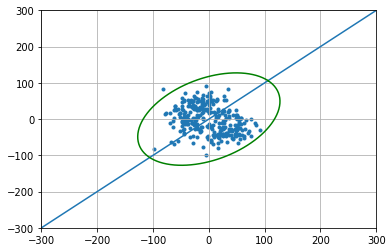

In [18]:
import numpy as np
from math import pi, cos, sin

u=0.       #x-position of the center
v=0.      #y-position of the center
a=150.       #radius on the x-axis
b=100.      #radius on the y-axis
t_rot=pi/4 #rotation angle

t = np.linspace(0, 2*pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
x=[]
y=[]
for i in range (1,298):
  x.append(df['746'][i-1]-df['746'][i])
  y.append(df['746'][i]-df['746'][i+1])
plt.axis([-300, 300, -300, 300])
plt.grid(True)
plt.plot([-300,300],[-300,300])
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'g' )    #rotated ellipse
plt.scatter(x,y,marker='.')
plt.show()